## 1. Introduction

This chapter covers
- **Core** components of **neural networks**
- An introduction to **Keras**
- Using neural networks to solve basic classification and regression problems
    - Classifying movie reviews as positive or negative (**binary classification**)
    - Classifying news wires by topic (**multiclass classification**)
    - Estimating the price of a house, given real-estate data (**regression**)

## 2. Anatomy of a neural network

As you saw in the previous chapters, training a neural network revolves around the following objects:
 - **Layers**, which are combined into a network (or model)
 - The **input data** and corresponding **targets**
 - The **loss function**, which defines the **feedback signal used for learning**
 - The **optimizer**, which determines **how learning proceeds**
 
 <img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1CFWZALw9MnJvStvh8VkCAZFiVLs7E4lW">

### 2.1 Layers: the building blocks of deep learning

A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. Different layers are appropriate for different tensor formats and different types of data processing.

- **fully connected or dense layers**
    - simple vector data, stored in 2D tensors of shape
- **recurrent layers such as an LSTM layer**
    - Sequence data, stored in 3D tensors of shape
- **2D convolution layers (Conv2D)**
    - image data, stored in 4D tensors

### 2.2 Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:
- **Loss function** (objective function) — The quantity that will be minimized during training. It represents a measure of success for the task at hand.
- **Optimizer** — Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

**A neural network that has multiple outputs may have multiple loss functions (one per output)**. But the gradient-descent process must be based on a single scalar loss value; so, for multiloss networks, all losses are combined (via averaging) into a single scalar quantity.

Choosing the right objective function for the right problem is extremely important.

- **binary crossentropy**
    - two-class classification
- **categorical crossentropy**
    - many-class classification problem
- **mean squared error** 
    - regression problem
- **connectionist temporal classification (CTC)**
    - sequence-learning problem

## 3. Introduction to Keras

[Keras](https://keras.io/) is a **deep-learning framework for Python** that provides a convenient way to define and train almost any kind of deep-learning model.

Keras has the following key features:
- It allows the same code to run seamlessly on CPU or GPU.
- It has a user-friendly API that makes it easy to quickly prototype deep-learning models.
- It has built-in support for convolutional networks (for computer vision), recurrent
networks (for sequence processing), and any combination of both.
- It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. 


Keras is appropriate for building essentially any **deep-learning model**, from a **generative adversarial network**
to a **neural Turing machine**.

Keras is distributed under the permissive MIT license, which means **it can be freely used in commercial projects**. It’s compatible with any version of Python from 2.7 to 3.6 (as of april 2018).


**Keras is a model-level library**, providing high-level building blocks for developing deep-learning models. **It doesn’t handle low-level operations** such as tensor manipulation and differentiation. Instead, **it relies on a specialized, well-optimized tensor library** to do so, serving as the backend engine of Keras.

<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1XeOgdVuT35U9ahTWwO5vfW6EiUlklrql">

## 4.0 Classifying movie reviews: a binary classification example

**Two-class classification**, or **binary classification**, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

### 4.1 IMDB dataset

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into:

- 25,000 reviews for training
- 25,000 reviews for testing

each set consisting of 50% negative and 50% positive reviews.

In [1]:
# loading the IMDB dataset

from keras.datasets import imdb

# num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/Users/ivanovitch/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


17465344/17464789 [==============================] - 8s 0us/step


In [20]:
# The variables train_data and test_data are lists of reviews; 
# each review is a list of word indices (encoding a sequence of words)
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [21]:
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive
train_labels[0]

1

In [22]:
# Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [54]:
# how to decode one sequence back to english

# get all word indexes ('word': id)
word_index = imdb.get_word_index()

# get a new dict (id: 'word')
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Note that the indices are offset by 3 because 0, 1, and 2 are reserved 
# indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

### 4.1.1 Preparing the data

**You can’t feed lists of integers into a neural network**. You have to turn your lists into tensors. There are two ways to do that:
- Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices)
- One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. 

In [44]:
# Encoding the integer sequences into a binary matrix (25000,10000)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [51]:
print(x_train.shape)
print(x_train[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [52]:
# You should also vectorize your labels, which is straightforward

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 4.1.2 Building your network

- The input data is vectors
- The labels are scalars (1s and 0s)

A type of network that performs well on such a problem is **a simple stack of fully connected (Dense) layers** with relu activations 

>```python
Dense(16,activation='relu')
```

The argument being passed to each Dense layer (16) is the number of hidden units of the layer. **A hidden unit is a dimension in the representation space of the layer**. Remember that each such Dense layer with a relu activation implements the following chain of tensor operations:

>```python
output = relu(dot(W, input) + b)
```

Having 16 hidden units means the weight matrix W will have shape (input_dimension,16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). 

You can intuitively understand the dimensionality of your representation space as **“how much freedom you’re allowing the network to have when learning internal representations.”** 

- Having more hidden units (a higher-dimensional representation space) allows your network to learn more-complex representations
- But, having more hidden units make the network more computationally expensive and may lead to **learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).**


There are two **key architecture decisions** to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

In the next chapter, you’ll learn formal principles to guide you in making these choices. For the time being, you’ll have to trust me with the following architecture choice:

- Two intermediate layers with 16 hidden units each
- A third layer that will output the scalar prediction regarding the sentiment of the current review

The **intermediate layers will use relu** as their activation function, and the **final layer will use a sigmoid** activation so as to output a probability (a score between 0 and 1).

<table>
<tr>
    <td> <img src="https://drive.google.com/uc?export=view&id=1tGaZcNRpAmDaSEAOGCKGhH9QtPHlbDUi" width="150"> </td>
    <td> <img src="https://drive.google.com/uc?export=view&id=1ku-YktP--VeodXH1oaUPPtkvgfSVclm7" width="300"> </td>
    <td> <img src="https://drive.google.com/uc?export=view&id=1LoV52worh3m-S9uL4YvyDm2NVOcVDvaJ" width="300"> </td>
</tr>
</table>



In [57]:
from keras import models
from keras import layers

# the model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 4.1.3 Validating your approach

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [58]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [59]:
# Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.5085 - acc: 0.7815 - val_loss: 0.3797 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.2179 - acc: 0.9281 - val_loss: 0.3081 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1750 - acc: 0.9435 - val_loss: 0.2840 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1151 - acc: 0.9651 - val_loss: 0.3145 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.0978 - acc: 0.9706 - val_loss: 0.3127 - 

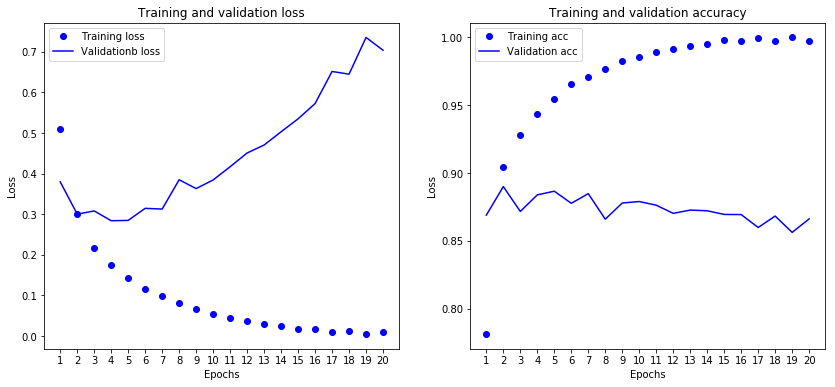

In [79]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history

# trainning loss X validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# trainning accuracy X validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(epochs, loss_values, 'bo', label='Training loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validationb loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_xticks(epochs)

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

- the training loss decreases with every epoch
- the training accuracy increases with every epoch

That’s what you would expect when running gradient descent optimization — the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is **overfitting**: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In [84]:
# this approach achieves an accuracy of 85%. With state-of-the-art approaches, you should be able to get close to 95%
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 90us/step


[0.7774300403499603, 0.85032]

### 4.1.4 Using a trained network to generate predictions on new data

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [85]:
model.predict(x_test)

array([[0.00902936],
       [0.9999999 ],
       [0.7757505 ],
       ...,
       [0.00240106],
       [0.00890265],
       [0.8260735 ]], dtype=float32)

model.predict_classes(x_test)

## 4.2 Further experiments

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
1. You used two hidden layers. **Try using one or three hidden layers**, and see how doing so affects validation and test accuracy.
2. Try using layers with more **hidden units** or fewer hidden units: **32 units, 64 units**, and so on.
3. Try using the **mse loss** function instead of binary_crossentropy.
4. Try using the **tanh activation** (an activation that was popular in the early days of neural networks) instead of relu.

### 4.2.1 Model 1

In [102]:
# parameters to be evaluate

hidden_units = [16,32,64]
activations_funct = ['relu','tanh']
loss_funct = ['binary_crossentropy', 'mean_squared_error']
training = []
results = []

In [ ]:
# the model definition
# layer_1,layer_2

for hidden in hidden_units:
    for activations in activations_funct:
        for losses in loss_funct:
            model = models.Sequential()
            model.add(layers.Dense(hidden, activation=activations, input_shape=(10000,)))
            model.add(layers.Dense(1, activation='sigmoid'))

            # compile the model
            model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
            
            # Training your model
            history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val, y_val))
            training.append(history)
            results.append(model.evaluate(x_test, y_test))

| Model           | Hidden Unit | Loss Function | Evaluation (accuracy) |
|-----------------|-------------|---------------|-----------------------|
| **relu,sigmoid(1)** | **16**          | **binary_cross**  |       ** 0.8574  **             |
| relu,sigmoid(1) | 16          | mse           |        0.8551             |
| tanh,sigmoid(1) | 16          | binary_cross  |        0.8513               |
| tanh,sigmoid(1) | 16          | mse           |        0.8515               |
| relu,sigmoid(1) | 32          | binary_cross  |         0.8500              |
| relu,sigmoid(1) | 32          | mse           |         0.8538              |
| tanh,sigmoid(1) | 32          | binary_cross  |          0.8460             |
| tanh,sigmoid(1) | 32          | mse           |          0.8469             |
| relu,sigmoid(1) | 64          | binary_cross  |         0.8470              |
| relu,sigmoid(1) | 64          | mse           |          0.8502             |
| tanh,sigmoid(1) | 64          | binary_cross  |         0.8464              |
| tanh,sigmoid(1) | 64          | mse           |         0.7906              |

The best accuary was 0.8575. 

- For all results the activation function relu was better than tanh
- 16 hidden units was a better choice when compared to 32 and 64

### 4.2.2 Model 2

In [104]:
# parameters to be evaluate

hidden_units = [16,32,64]
activations_funct = ['relu','tanh']
loss_funct = ['binary_crossentropy', 'mean_squared_error']
training = []
results = []

In [ ]:
# the model definition
# layer_1,layer_2,layer_3

for hidden in hidden_units:
    for activations in activations_funct:
        for losses in loss_funct:
            model = models.Sequential()
            model.add(layers.Dense(hidden, activation=activations, input_shape=(10000,)))
            model.add(layers.Dense(hidden, activation=activations))
            model.add(layers.Dense(1, activation='sigmoid'))

            # compile the model
            model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
            
            # Training your model
            history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val, y_val))
            training.append(history)
            results.append(model.evaluate(x_test, y_test))

| Model           | Hidden Unit | Loss Function | Evaluation (accuracy) |
|-----------------|-------------|---------------|-----------------------|
| relu,relu,sigmoid(1) | 16         | binary_cross  |        0.8519               |
| relu,relu,sigmoid(1) | 16          | mse           |        0.8510             |
| tanh,relu,sigmoid(1) | 16          | binary_cross  |        0.8433               |
| tanh,relu,sigmoid(1) | 16          | mse           |        0.8503               |
| relu,relu,sigmoid(1) | 32          | binary_cross  |         0.8485              |
| relu,relu,sigmoid(1) | 32          | mse           |         0.8534              |
| tanh,relu,sigmoid(1) | 32          | binary_cross  |          0.8458             |
| tanh,relu,sigmoid(1) | 32          | mse           |          0.8519             |
| relu,relu,sigmoid(1) | 64          | binary_cross  |         0.8535              |
| **relu,relu,sigmoid(1)** | **64**          | **mse**           |          **0.8588**             |
| tanh,relu,sigmoid(1) | 64          | binary_cross  |         0.8432              |
| tanh,relu,sigmoid(1) | 64          | mse           |         0.8550              |

The best accuary was 0.8588. 

- For all results the activation function relu was better than tanh
- 64 hidden units was a better choice when compared to 16 and 32

### 4.2.3 Model 3

In [105]:
# parameters to be evaluate

hidden_units = [16,32,64]
activations_funct = ['relu','tanh']
loss_funct = ['binary_crossentropy', 'mean_squared_error']
training = []
results = []

In [ ]:
# the model definition
# layer_1,layer_2,layer_3, layer_4

for hidden in hidden_units:
    for activations in activations_funct:
        for losses in loss_funct:
            model = models.Sequential()
            model.add(layers.Dense(hidden, activation=activations, input_shape=(10000,)))
            model.add(layers.Dense(hidden, activation=activations))
            model.add(layers.Dense(hidden, activation=activations))
            model.add(layers.Dense(1, activation='sigmoid'))

            # compile the model
            model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
            
            # Training your model
            history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val, y_val))
            training.append(history)
            results.append(model.evaluate(x_test, y_test))

| Model           | Hidden Unit | Loss Function | Evaluation (accuracy) |
|-----------------|-------------|---------------|-----------------------|
| relu,relu,relu,sigmoid(1) | 16         | binary_cross  |        0.8509               |
| relu,relu,relu,sigmoid(1) | 16          | mse           |        0.8532             |
| tanh,relu,relu,sigmoid(1) | 16          | binary_cross  |        0.8457               |
| tanh,relu,relu,sigmoid(1) | 16          | mse           |        0.8530               |
| relu,relu,relu,sigmoid(1) | 32          | binary_cross  |         0.8480              |
| relu,relu,relu,sigmoid(1) | 32          | mse           |         0.8546              |
| tanh,relu,relu,sigmoid(1) | 32          | binary_cross  |          0.8432             |
| tanh,relu,relu,sigmoid(1) | 32          | mse           |          0.8514             |
| relu,relu,relu,sigmoid(1) | 64          | binary_cross  |         0.8589              |
| **relu,relu,relu,sigmoid(1)** | **64**          | **mse**           |          **0.8614**             |
| tanh,relu,relu,sigmoid(1) | 64          | binary_cross  |         0.8452              |
| tanh,relu,relu,sigmoid(1) | 64          | mse           |         0.8530              |

The best accuary was 0.8614. 

- For all results the activation function relu was better than tanh
- 64 hidden units was a better choice when compared to 16 and 32

## 4.3 Wrapping up

Here’s what you should take away from this example:
- You usually need to do quite a bit of **preprocessing on your raw data** in order to be able to feed it—as tensors—into a neural network. 
- Stacks of Dense layers with **relu activations can solve a wide range of problems** and you’ll likely use them frequently.
- In a **binary classification** problem (two output classes), your network should **end with a Dense layer with one unit and a sigmoid activation**: the output of your network should be a scalar between 0 and 1, encoding a probability.
- The **rmsprop optimizer** is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start **overfitting** and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of
the training set.

# 5. Classifying newswires:a multiclass classification example

In the previous section, you saw how to classify vector inputs into two mutually exclusive classes using a densely connected neural network. **But what happens when you have more than two classes?**

In this section, you’ll build a network to **classify Reuters newswires into 46 mutually exclusive topics**. Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of **single-label, multiclass classification**. If each data point could belong to multiple categories (in this case, topics), you’d be facing a **multilabel, multiclass classification problem**.

In [106]:
# Loading the Reuters dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 12s 6us/step


In [109]:
# 8982 train data samples
print(len(train_data))

# 2246 test data samples
print(len(test_data))

8982
2246


In [111]:
# print a train data sample
print(train_data[3])

[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 465, 893, 3541, 114, 2902, 69, 312, 35, 15, 7, 335, 1679, 21, 25, 3675, 2, 3498, 58, 69, 68, 493, 5, 25, 465, 377, 2430, 4, 293, 1172, 739, 4379, 8, 7, 1510, 1131, 13, 899, 6, 4, 990, 309, 415, 4519, 6920, 645, 3916, 791, 5, 4379, 75, 8, 24, 10, 1311, 4677, 5, 344, 756, 7, 2, 231, 9691, 2603, 1413, 43, 509, 43, 68, 327, 5, 2, 3498, 297, 638, 73, 430, 22, 4, 580, 7, 48, 41, 30, 2, 136, 4, 344, 298, 4, 580, 40, 344, 5078, 2, 291, 1488, 10, 3148, 5, 231, 6250, 1308, 5, 8250, 7043, 21, 2, 1622, 990, 309, 415, 265, 5992, 8945, 1149, 9118, 2, 4, 344, 9691, 756, 3729, 2, 4667, 2, 3249, 28, 10, 2190, 24, 77, 41, 682, 10, 4851, 2048, 7, 4, 5540, 2926, 1598, 22, 370, 5954, 7541, 5, 54, 5232, 1685, 2916, 10, 1571, 946, 60, 51, 3249, 5249, 4, 73, 2135, 669, 4, 580, 64, 10, 4280, 6, 2, 25, 482, 35, 150, 377, 2430, 7, 10, 2, 836, 2, 4730, 6920, 5, 4379, 2, 2, 3541, 8, 4, 344, 291, 2, 298, 4228, 6, 2223, 24, 2, 41, 343, 430, 210, 6, 3498, 297, 64, 10, 2281,

In [112]:
# Decoding newswires back to text
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[3]])
decoded_newswire

557056/550378 [==============================] - 1s 3us/step


"? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely ? borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in ? financial eligibility standards indicated as many as one half of ? borrowers who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed evaluating ? credit using a variety of financial ratios instead of relying solely on ? ability senate agriculture committee chairman patrick leahy d vt ? the proposed eligibility changes telling ? administrator ? clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming a big city bank but

In [113]:
# Encoding the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [114]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [115]:
# Model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:

- **You end the network with a Dense layer of size 46**. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
- The **last layer uses a softmax activation**. You saw this pattern in the MNIST example. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample belongs to class i. **The 46 scores will sum to 1.**

In [116]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**The best loss function to use in this case is categorical_crossentropy**. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output something as close as possible to the true labels.

In [117]:
# Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [118]:
# Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 353us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 246us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 213us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 214us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 213us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 212us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


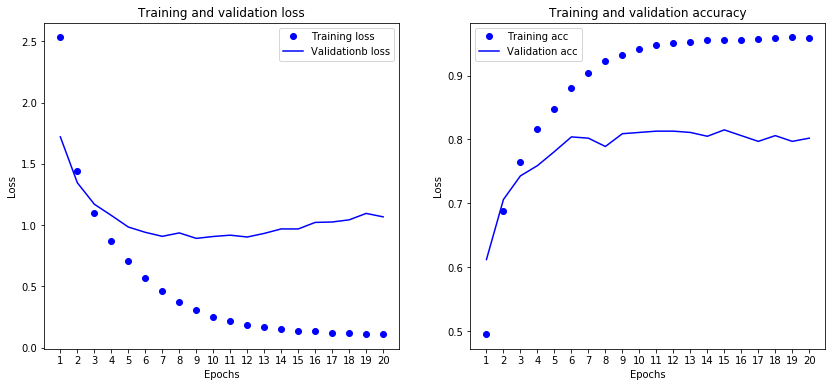

In [119]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history

# trainning loss X validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# trainning accuracy X validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(epochs, loss_values, 'bo', label='Training loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validationb loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_xticks(epochs)

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [121]:
# evaluating the model
model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 1s 314us/step


[1.2092602904736731, 0.778717720444884]

In [127]:
# Generating predictions for new data
predictions = model.predict(x_test)

# Each entry in predictions is a vector of length 46
print(predictions[0].shape)

# The coefficients in this vector sum to 1
print(np.sum(predictions[0]))

# The largest entry is the predicted class—the class with the highest probability
print(np.argmax(predictions[0]))

(46,)
1.0
3


## 5.1 A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like this:

>```python
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```

The only thing this approach would change is the choice of the loss function. The loss function categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_crossentropy.

>```python
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['acc'])
```

This new loss function is still mathematically the same as categorical_crossentropy; it just has a different interface.

## 5.2 The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional.

In [137]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 288us/step - loss: 3.6391 - acc: 0.0253 - val_loss: 3.4292 - val_acc: 0.0370
Epoch 2/20
7982/7982 [==============================] - 2s 202us/step - loss: 3.2606 - acc: 0.0411 - val_loss: 3.0981 - val_acc: 0.0410
Epoch 3/20
7982/7982 [==============================] - 2s 200us/step - loss: 2.8813 - acc: 0.0614 - val_loss: 2.7139 - val_acc: 0.1840
Epoch 4/20
7982/7982 [==============================] - 2s 202us/step - loss: 2.4411 - acc: 0.3711 - val_loss: 2.3154 - val_acc: 0.5850
Epoch 5/20
7982/7982 [==============================] - 2s 204us/step - loss: 2.0331 - acc: 0.6210 - val_loss: 1.9915 - val_acc: 0.6110
Epoch 6/20
7982/7982 [==============================] - 2s 202us/step - loss: 1.7275 - acc: 0.6339 - val_loss: 1.7804 - val_acc: 0.6200
Epoch 7/20
7982/7982 [==============================] - 2s 203us/step - loss: 1.5299 - acc: 0.6423 - val_loss: 1.6590 - val_acc: 0.6210


In [130]:
# evaluating the model
model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 1s 340us/step


[1.8839720140475835, 0.685218165680859]

**The network now peaks at ~70% validation accuracy, an 8% absolute drop**. This drop is mostly due to the fact that you’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional.

## 5.3 Further experiments

- Try using larger or smaller layers: 32 units, 128 units, 256, and so on.
- You used two hidden layers. Now try using a single hidden layer, three hidden layers or four hidden layers.

In [138]:
# parameters to be evaluate

hidden_units = [32,64,128,256]
activations_funct = ['relu']
loss_funct = ['categorical_crossentropy']
training = []
results = []

### 5.3.1 Model 1

In [139]:
# the model definition
# layer_1,layer_2,layer_3

for hidden in hidden_units:
    for activations in activations_funct:
        for losses in loss_funct:
            model = models.Sequential()
            model.add(layers.Dense(hidden, activation=activations, input_shape=(10000,)))
            model.add(layers.Dense(hidden, activation=activations))
            model.add(layers.Dense(46, activation='softmax'))

            # compile the model
            model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
            
            # Training your model
            history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val, y_val))
            training.append(history)
            results.append(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 230us/step - loss: 3.0657 - acc: 0.4982 - val_loss: 2.3332 - val_acc: 0.6180
Epoch 2/20
7982/7982 [==============================] - 1s 165us/step - loss: 1.8983 - acc: 0.6625 - val_loss: 1.6828 - val_acc: 0.6620
Epoch 3/20
7982/7982 [==============================] - 1s 156us/step - loss: 1.4131 - acc: 0.7111 - val_loss: 1.4089 - val_acc: 0.6970
Epoch 4/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.1606 - acc: 0.7506 - val_loss: 1.2709 - val_acc: 0.7190
Epoch 5/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.9895 - acc: 0.7858 - val_loss: 1.1869 - val_acc: 0.7380
Epoch 6/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.8551 - acc: 0.8181 - val_loss: 1.1276 - val_acc: 0.7480
Epoch 7/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.7450 - acc: 0.8409 - val_loss: 1.0611 - val_acc: 0.7770


In [140]:
results

[[1.1569367890260311, 0.7822796082454182],
 [1.162199652630202, 0.7943009795191451],
 [1.2036228073779112, 0.7938557435971546],
 [1.2687694323667966, 0.7951914515223549]]

### 5.3.2 Model 2

In [141]:
# the model definition
# layer_1,layer_2,layer_3, layer4

for hidden in hidden_units:
    for activations in activations_funct:
        for losses in loss_funct:
            model = models.Sequential()
            model.add(layers.Dense(hidden, activation=activations, input_shape=(10000,)))
            model.add(layers.Dense(hidden, activation=activations))
            model.add(layers.Dense(hidden, activation=activations))
            model.add(layers.Dense(46, activation='softmax'))

            # compile the model
            model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
            
            # Training your model
            history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_val, y_val))
            training.append(history)
            results.append(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 245us/step - loss: 3.1824 - acc: 0.3825 - val_loss: 2.4689 - val_acc: 0.5030
Epoch 2/20
7982/7982 [==============================] - 1s 160us/step - loss: 2.0757 - acc: 0.5942 - val_loss: 1.7824 - val_acc: 0.6080
Epoch 3/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.5601 - acc: 0.6753 - val_loss: 1.4904 - val_acc: 0.6810
Epoch 4/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.2956 - acc: 0.7184 - val_loss: 1.3285 - val_acc: 0.7030
Epoch 5/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.1153 - acc: 0.7471 - val_loss: 1.2305 - val_acc: 0.7160
Epoch 6/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.9719 - acc: 0.7761 - val_loss: 1.1935 - val_acc: 0.7270
Epoch 7/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.8581 - acc: 0.8039 - val_loss: 1.1256 - val_acc: 0.7480


In [143]:
results[4:]

[[1.3508902889007133, 0.7560106857164779],
 [1.2909313868117567, 0.7756010685928783],
 [1.2592158557470632, 0.7885129118963532],
 [1.5368605307564605, 0.7626892253424796]]

## 5.4 Wrapping up

Here’s what you should take away from this example:

1. If you’re trying to **classify data points among N classes**, your network should **end with a Dense layer of size N**.
2. In a **single-label, multiclass classification** problem, your network should **end with a softmax** activation so that it will output a probability distribution over the N output classes.
3. **Categorical crossentropy is almost always the loss function you should use for such problems**. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
4. There are two ways to handle labels in multiclass classification:
    - Encoding the labels via **categorical encoding** (also known as one-hot encoding) and using **categorical_crossentropy** as a loss function
    - **Encoding the labels as integers** and using the **sparse_categorical_crossentropy** loss function
5. If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small (**less than 46 in this example**)

# 6. Predicting house prices: a regression example

The two previous examples were considered classification problems, where the goal was to predict a single discrete label of an input data point. Another common type of machine-learning problem is regression, which consists of predicting a continuous
value instead of a discrete label: for instance, predicting the temperature tomorrow, given meteorological data; or predicting the time that a software project will take to complete, given its specifications.

> Don’t confuse regression and the algorithm logistic regression. Confusingly, **logistic regression isn’t a regression algorithm—it’s a classification algorithm**.

## 6.1 The Boston Housing Price dataset

- You’ll attempt to predict the median price of homes in a given **Boston suburb in the mid-1970s** given data points about the suburb at the time, such as the **crime rate, the local property tax rate**, and so on. 
- The dataset has relatively **few data points**: only 506, split between 404 training samples and 102 test samples. 
- Each **feature** in the input data (for example, the crime rate) has a **different scale**. 
- For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.

In [176]:
# Loading the Boston housing dataset

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Training sample size
print(train_data.shape)

# Test sample size
print(test_data.shape)

(404, 13)
(102, 13)


In [177]:
# Train targets x  U$ 1,000 - value are between 5.0 and 50.0
print(np.min(train_targets))
print(np.max(train_targets))

5.0
50.0


### 6.1.1 Preparing the data

**It would be problematic to feed into a neural network** values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do **feature-wise normalization**: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in [Scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html).


The [**preprocessing module**](http://scikit-learn.org/stable/modules/preprocessing.html) further provides a utility **class StandardScaler** that implements the Transformer API to compute the **mean** and **standard deviation** on a **training set** so as to be able to **later reapply the same transformation on the testing set**. 

In [178]:
# Normalizing the data

from sklearn import preprocessing

# create a scaler to fit train_data
scaler = preprocessing.StandardScaler().fit(train_data)

# feature-wise normalization over train_data
train_data_scaled = scaler.transform(train_data)

# Scaled train data has zero mean and unit variance
print(train_data_scaled.mean(axis=0))
print(train_data_scaled.std(axis=0))

# Note that the quantities used for normalizing the test data are computed using the training data. 
# You should never use in your workflow any quantity computed on the test data, 
# even for something as simple as data normalization.
test_data_scaled = scaler.transform(test_data)

[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 6.1.2 Building your network

Because so few samples are available, you’ll use a very small network with two hidden layers, each with 64 units. **In general, the less training data you have, the worse overfitting will be**, and using a small network is one way to mitigate overfitting.

In [179]:
# Model definition

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data_scaled.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    
    # The network ends with a single unit and no activation (it will be a linear layer). 
    # This is a typical setup for scalar regression (a regression where you’re trying 
    # to predict a single continuous value).
    model.add(layers.Dense(1))
    
    # compile the network with the mse loss function—mean squared error,
    # the square of the difference between the predictions and the targets. 
    # This is a widely used loss function for regression problems.
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    # You’re also monitoring a new metric during training: mean absolute error (MAE). 
    # It’s the absolute value of the difference between the predictions and the targets.
    return model

### 6.1.3 Validating your approach using K-fold validation

- To evaluate your network while you keep adjusting its parameters (such as the number of epochs used for training), you could **split the data into a training set and a validation set**
- Because you have so **few data points**, the validation set would end up being very small.
- The best practice in such situations is to use **K-fold cross-validation**.
    - It consists of splitting the available data into K partitions (typically K = 4 or 5)
    - Instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. 
    - The **validation score** for the model used is then the **average of the K validation scores obtained**. 
    

In [188]:
from sklearn.model_selection import KFold

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define k-fold cross validation test
kf = KFold(n_splits=4, random_state=seed)

all_mae_histories = []

for train, test in kf.split(train_data_scaled, train_targets):
    # create model
    model = build_model()
    history = model.fit(train_data_scaled[train], 
              train_targets[train], 
              epochs=100, 
              batch_size=1, 
              verbose=1,
              validation_data=(train_data_scaled[test], 
                               train_targets[test]))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 2s 7ms/step - loss: 205.3034 - mean_absolute_error: 10.9715 - val_loss: 30.4058 - val_mean_absolute_error: 3.6577
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 26.9031 - mean_absolute_error: 3.5319 - val_loss: 20.6360 - val_mean_absolute_error: 3.0265
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 20.2009 - mean_absolute_error: 3.0268 - val_loss: 16.3316 - val_mean_absolute_error: 2.8215
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 17.9474 - mean_absolute_error: 2.7880 - val_loss: 14.2374 - val_mean_absolute_error: 2.2671
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 16.1364 - mean_absolute_error: 2.6858 - val_loss: 14.0621 - val_mean_absolute_error: 2.1950
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 14.8039 - mean_absolute_error: 2.5254 - va

In [196]:
# mae for each k-fold step
np.mean(all_mae_histories,axis=1)

array([2.06872889, 2.54058853, 2.73671882, 2.65800705])

The different runs do indeed show rather different validation scores, from 2.1 to 2.7. The average (2.5) is a much more reliable metric than any single score - that’s the entire point of K-fold cross-validation. In this case, you’re off by \$2,500 on average, which is significant considering that the prices range from \$10,000 to \$50,000.

In [197]:
np.mean(all_mae_histories)

2.50101082025188

In [198]:
# Building the history of successive mean K-fold validation scores
num_epochs = 100
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

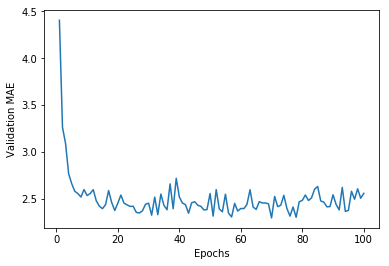

In [201]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [210]:
epochs_min = np.argmin(average_mae_history)
print('Minimum MAE: {:.4f}\nEpoch: {:d}'.format(average_mae_history[epochs_min],epochs_min))

Minimum MAE: 2.2985
Epoch: 69


In [213]:
# Training the final model

model = build_model()
model.fit(train_data_scaled, 
          train_targets,
          epochs=69, 
          batch_size=1, 
          verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data_scaled, test_targets)

102/102 [==============================] - 0s 4ms/step


In [214]:
test_mae_score

2.3270663373610554

## 6.2 Wrapping up

Here’s what you should take away from this example:

- **Mean squared error (MSE)** is a **loss function** commonly used for **regression**.
- A common **regression metric** is **mean absolute error (MAE)**.
- When **features** in the input data have values in **different ranges**, each feature should be **scaled independently** as a preprocessing step.
- When there is **little data available, using K-fold validation** is a great way to reliably evaluate a model.
- When **little training data** is available, it’s preferable to use a **small network with few hidden layers** (typically only one or two), in order to avoid severe overfitting.


# 7. Chapter summary

- You’re now able to handle the most common kinds of machine-learning tasks on vector data: **binary classification, multiclass classification, and scalar regression**. 
- You’ll usually need to **preprocess raw data** before feeding it into a neural network.
- When your data has features with different ranges, **scale each feature** independently as part of preprocessing.
- As training progresses, neural networks eventually begin to **overfit** and obtain worse results on never-before-seen data.
- **If you don’t have much training data, use a small network** with only one or two hidden layers, to avoid severe overfitting.
- If your data is divided into **many categories**, you may cause information **bottlenecks if you make the intermediate layers too small**.
- Regression uses different loss functions and different evaluation metrics than classification.
- When you’re working with **little data, K-fold** validation can help reliably evaluate your model.